In [1]:
import numpy as np
import scipy.sparse as sps
import porepy as pp

In [2]:
import sys
sys.path.append("./class")
from Transport_class import Transport

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:241: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim3d(z)


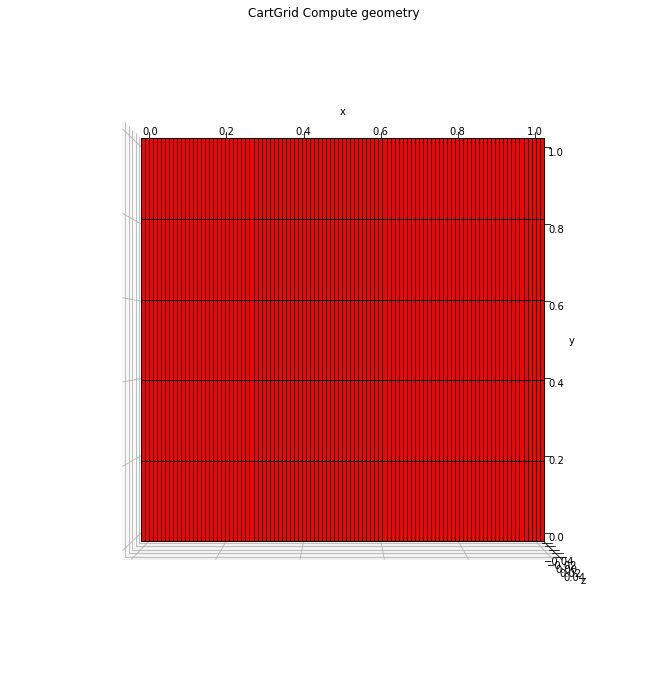

In [3]:
Nx=100
Ny=5
Lx=1.0
Ly=1.0
delta_y=Ly/Ny
#phys_dims=[0.045,0.01]
phys_dims=[Lx,Ly]
g=pp.CartGrid([Nx,Ny],phys_dims)
g.compute_geometry()        
pp.plot_grid(g, figsize=(15,12))

In [4]:
unity = np.ones(g.num_cells)
empty = np.empty(0)
#porosity=0.3*unity
porosity=unity
aperture=1
bc_type=["dir","dir"]
#bc_value=[0.,0.]
bc_value=[1.0,0.0]
#bc_value=[0.38553623, 0.]
#init_cond=lambda x,y,z:int(x<0.5)
#init_cond=lambda x,y,z:int(x<0.2)
init_cond=lambda x,y,z:0.0
#init_cond=lambda x,y,z:0.00545 
print(g.num_faces)

1105


In [5]:
specified_parameters = {
            "bc_type": bc_type,
            "bc_value": bc_value,
            #"time_step": 34.56,
            "time_step": 0.01,
            "mass_weight": porosity * aperture,
            "darcy_flux":np.zeros(g.num_faces),
            #"darcy_flux":6.67e-9*np.ones(Nx+1),
            "t_max": 1,
            #"t_max":345600,
            "method": "Implicit",
            #"method":"Explicit",
            "lambda_lin_decay":0,
            "initial_cond":init_cond,
}
print(g.num_cells)
print(g.num_faces)

500
1105


In [6]:
specified_parameters["darcy_flux"][:(Nx+1)*Ny]=delta_y*1.
#specified_parameters["darcy_flux"][:(Ny+1)*Nx]=6.67e-9
#print("(Nx+1)*Ny")
#print((Nx+1)*Ny)
#print("vel")
#print(specified_parameters["darcy_flux"])
vel=specified_parameters["darcy_flux"]

In [7]:
tracer=np.zeros(g.num_cells)
transport=Transport(g,specified_parameters)
#transport.set_bc()
#transport.set_initial_cond(tracer)
#lhs,rhs_b,rhs_matrix=transport.get_transport_lhs_rhs()
lhs,rhs_b,rhs_matrix=transport.set_and_get_matrices(tracer)
print("tracer=")
print(tracer)
print("lhs")
print(lhs.shape)
print(lhs)
print("rhs_b")
print(rhs_b)
print("rhs_matrix")
print(rhs_matrix)

tracer=
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

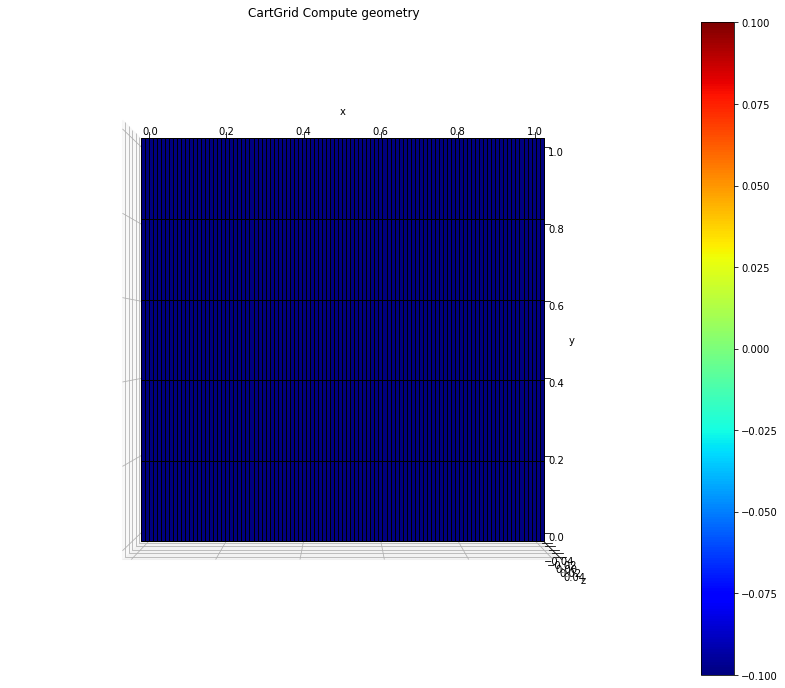

In [8]:
pp.plot_grid(g, tracer, figsize=(15, 12))

In [9]:
IEsolver = sps.linalg.factorized(lhs)

data_transport=transport.data[pp.PARAMETERS]["transport"]
n_steps = int(np.round(data_transport["t_max"] / data_transport["time_step"]))

save_every=1

# Exporter
exporter = pp.Exporter(transport.g, file_name="tracer",folder_name="solution_transport_2D")
    
for i in range(1,n_steps+1,1):
#for i in range(1,2,1):
    if np.isclose(i % save_every, 0):
        # Export existing solution (final export is taken care of below)
        exporter.write_vtu({"tracer":tracer}, time_step=int(i // save_every))
        if data_transport["method"]=="Explicit":
            tracer = IEsolver(rhs_matrix*tracer+rhs_b)
            #print(tracer)
        else:
            tracer = IEsolver(rhs_matrix*tracer+rhs_b)
            #print(tracer)
        #pp.plot_grid(g, tracer, figsize=(15, 12))
print(tracer)
exporter.write_vtu({"tracer":tracer}, time_step=(n_steps // save_every))
time_steps = np.arange(0,data_transport["t_max"] + data_transport["time_step"], save_every * data_transport["time_step"])
exporter.write_pvd(time_steps)

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999999
 0.99999998 0.99999997 0.99999994 0.99999988 0.99999979 0.99999964
 0.99999938 0.99999895 0.99999825 0.99999714 0.99999538 0.99999265
 0.99998847 0.99998216 0.99997276 0.99995894 0.99993886 0.99991007
 0.99986929 0.9998122  0.99973318 0.99962506 0.99947872 0.99928277
 0.99902314 0.99868263 0.99824053 0.99767212 0.99694827 0.99603511
 0.99489367 0.99347964 0.99174329 0.98962948 0.98707781 0.98402299
 0.98039539 0.97612178 0.97112627 0.96533149 0.95865986 0.95103514
 0.94238402 0.93263783 0.92173427 0.9096192  0.8962483  0.88158864
 0.86562009 0.84833647 0.82974654 0.80987454 0.78876055 0.76646037
 0.74304518 0.71860076 0.69322638 0

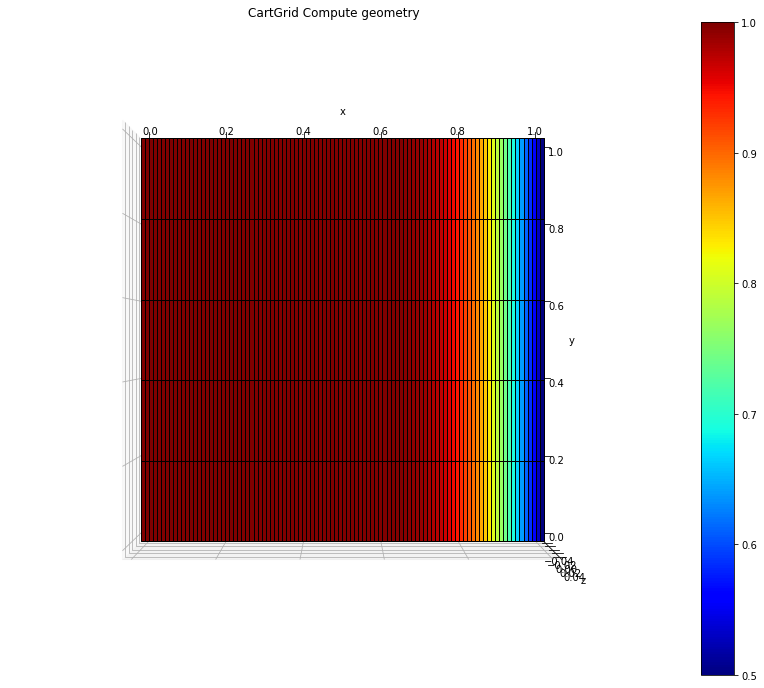

In [10]:
pp.plot_grid(g, tracer, figsize=(15, 12))